### Analisando visualmente o tráfego da rodovia I-94

O objetivo deste projeto é realizar uma análise visual dos dados de tráfego da rodovia [I-94 Interstate](https://en.wikipedia.org/wiki/Interstate_94). Você encontra o dataset [aqui](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

Irei procurar identificar visualmente possíveis indicadores de tráfego pesado.

O dicionário do dataset traz as seguintes informações:

* holiday - Categorical - Indica qual o feriado, caso seja.
* temp - Numeric - Temperatura média em Kelvin
* rain_1h - Numeric - Quantidade de chuva em mm que ocorreu ao longo da hora
* snow_1h - Numeric - Quantidade de neve em mm que ocorreu ao longo da hora
* clouds_all - Numeric - Porcentagem de cobrimento das nuvens
* weather_main - Categorical - Descrição curta das condições climáticas
* weather_description - Categorical - Descrição longa das condições climáticas
* date_time - DateTime - Data e hora de coleta da informação no fuso-horário CST
* traffic_volume - Numeric - Volume de tráfego de carros por hora 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz')

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Como podemos ver não há dados faltantes em nenhuma das colunas

In [5]:
sns.set_style(style = 'whitegrid')

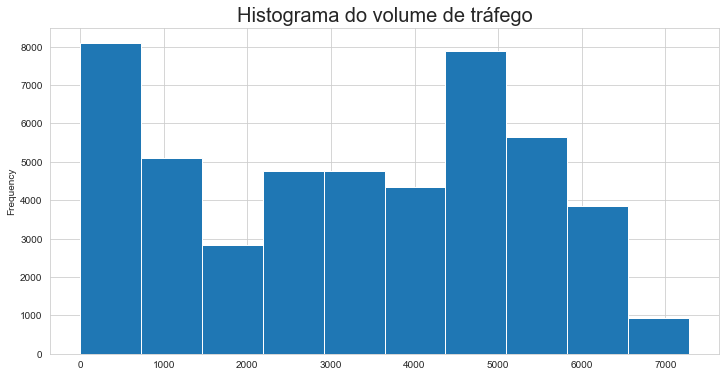

In [6]:
plt.figure(figsize=(12,6))
df['traffic_volume'].plot.hist()
plt.title('Histograma do volume de tráfego', fontsize = 20);

In [7]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Vendo o gráfico e a tabela acima podemos ver dois picos distintos, o primeiro pico mostrando um tráfego que não chega a 800 veículos. Já o segundo mostra uma grande frequência da ocorrência de por volta de 5000 veículos

Vamos ver como o tráfego se comporta em dois períodos, dia e noite. Definindo dia como o horário das 7 até as 19h e noite das 19h até as 7h

In [8]:
df['date_time'] = pd.to_datetime(df['date_time'], format = '%Y-%m-%d %H:%M:%S')

In [9]:
df['hour'] = df['date_time'].dt.hour

In [10]:
df_d = df.copy().loc[(df['hour'] >= 7) & (df['hour'] < 19)]

In [11]:
df_n = df.copy().loc[(df['hour'] >= 19) | (df['hour'] < 7)]

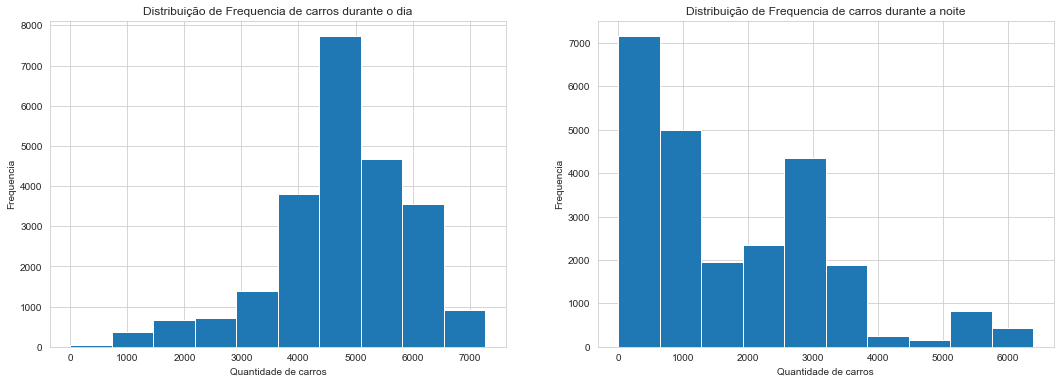

In [12]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.hist(df_d['traffic_volume'])
plt.title('Distribuição de Frequencia de carros durante o dia')
plt.xlabel('Quantidade de carros')
plt.ylabel('Frequencia')

plt.subplot(1,2,2)
plt.hist(df_n['traffic_volume'])
plt.title('Distribuição de Frequencia de carros durante a noite')
plt.xlabel('Quantidade de carros')
plt.ylabel('Frequencia')

plt.show()

Como observado no gráfico acima, pode-se ver que o maior pico no tráfego ocorre pela manhã. Sendo na ordem de 5x maior que o pico de tráfego noturno

Vamos ver se há diferença ao longo dos meses do ano

In [13]:
df_d['month'] = df_d['date_time'].dt.month

In [14]:
by_month = df_d.pivot_table(index = 'month', values = 'traffic_volume', aggfunc = 'mean')

In [15]:
by_month.reset_index(inplace = True)

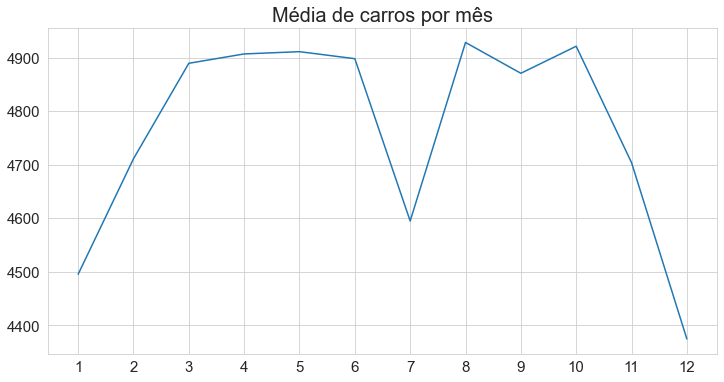

In [16]:
plt.figure(figsize=(12,6))
plt.plot(by_month['month'],by_month['traffic_volume'])
plt.xticks(ticks = [10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9])
plt.title('Média de carros por mês', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Podemos observar que nos meses de férias há uma queda vertiginosa nos volume médio de carros.

Vamos ver se há diferença nos dias da semana

In [17]:
df_d['day'] = df_d['date_time'].dt.dayofweek

In [18]:
by_day = df_d.pivot_table(index = 'day', values = 'traffic_volume', aggfunc = 'mean')

In [19]:
by_day.reset_index(inplace = True)

In [20]:
by_day['day'] = by_day['day'].replace({0: 'Seg', 1:'Ter',2:'Qua',3:'Qui',4:'Sex',5:'Sab',6:'Dom'})

In [21]:
by_day

,day,traffic_volume
0,Seg,4893.551286
1,Ter,5189.004782
2,Qua,5284.454282
3,Qui,5311.303730
4,Sex,5291.600829
5,Sab,3927.249558
6,Dom,3436.541789


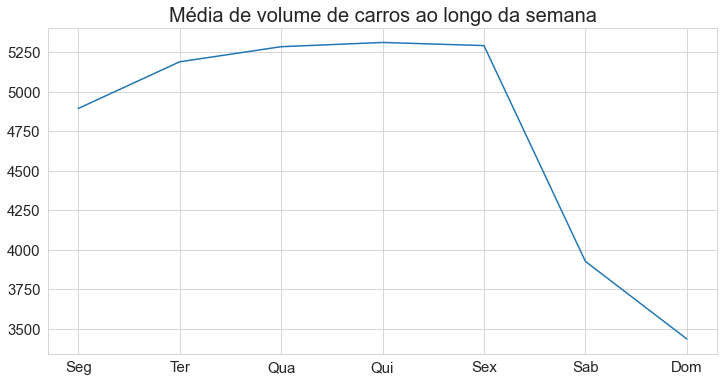

In [22]:
plt.figure(figsize=(12,6))
plt.title('Média de volume de carros ao longo da semana', fontsize = 20)
plt.plot(by_day['day'],by_day['traffic_volume'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Como esperado, o volume durante o sábado e domingo são bem menores que durante a semana. Vamos analisar isso mais a fundo, comparando como o volume flutua, em média, ao longo do dia nos dias úteis e nos finais de semana

In [23]:
diautil = df_d.copy().loc[df_d['day'] <= 4]
fds = df_d.copy().loc[df_d['day'] >= 5]


In [24]:
ph_du = diautil.pivot_table(index = 'hour', values = 'traffic_volume', aggfunc = 'mean')

ph_fds = fds.pivot_table(index = 'hour', values = 'traffic_volume', aggfunc = 'mean')

In [25]:
ph_du.reset_index(inplace = True)
ph_fds.reset_index(inplace = True)

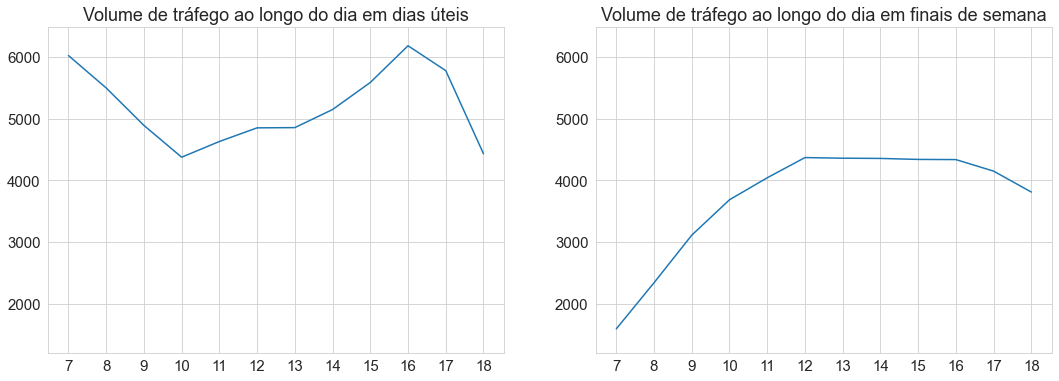

In [26]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(ph_du['hour'], ph_du['traffic_volume'])
plt.title('Volume de tráfego ao longo do dia em dias úteis', fontsize = 18)
plt.ylim((1200,6500))
plt.xticks(ticks = [7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(1,2,2)
plt.plot(ph_fds['hour'], ph_fds['traffic_volume'])
plt.title('Volume de tráfego ao longo do dia em finais de semana', fontsize = 18)
plt.xticks(ticks = [7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
plt.ylim((1200,6500))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

Podemos observar que durante os dias utéis há um pico nos horários de saída e retorno do trabalho. Além disso, pode-se ver que o menor volume de carros nos dias úteis é próximo ao pico de volume nos finais de semana.

Vamos agora observar o impacto das condições meterológicas no tráfego

In [27]:
by_weatherm = df_d.pivot_table(index = 'weather_main', values = 'traffic_volume', aggfunc = 'mean')

by_weatherd = df_d.pivot_table(index = 'weather_description', values = 'traffic_volume', aggfunc = 'mean')

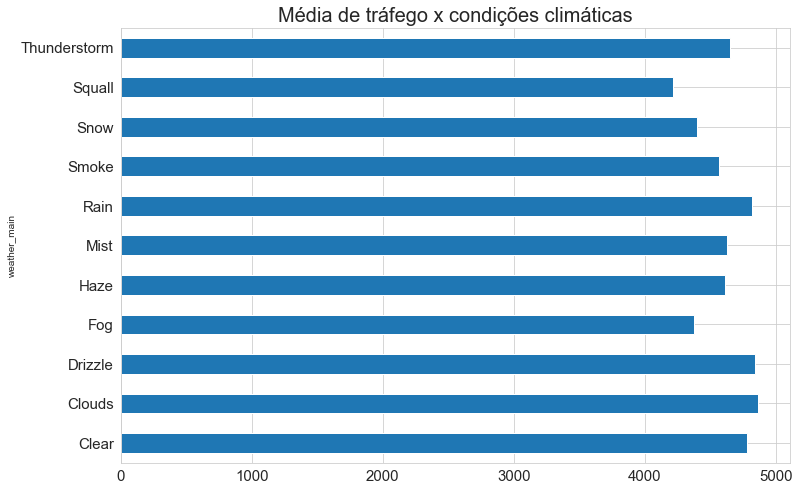

In [28]:
plt.figure(figsize=(12,8))
plt.title('Média de tráfego x condições climáticas', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
by_weatherm['traffic_volume'].plot.barh();

Utilizando as descrições curtas não conseguimos encontrar nenhum evento que indique uma média acima de 5000 mil carros por hora

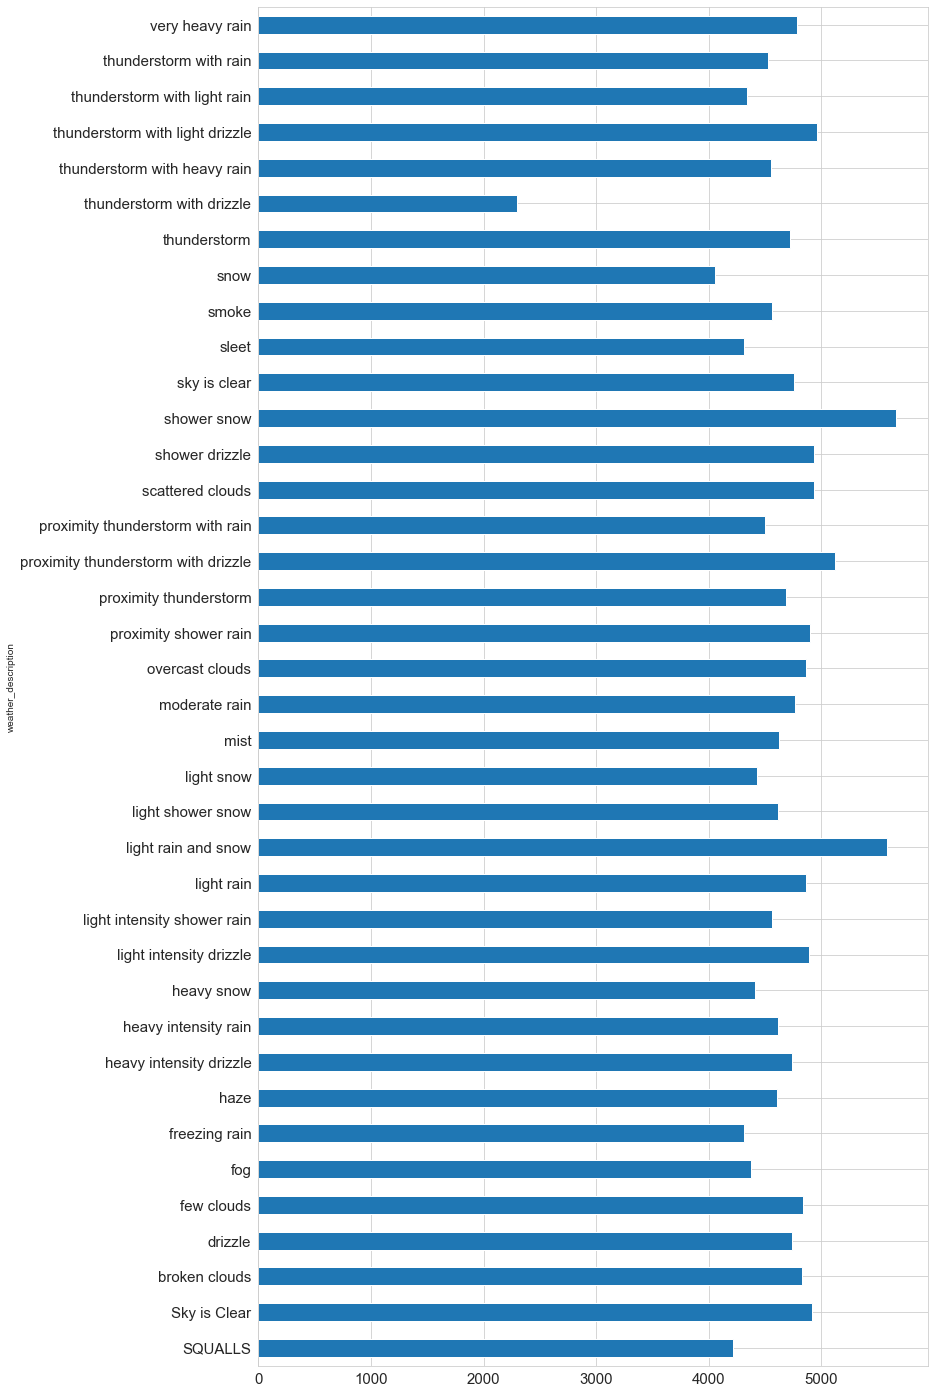

In [29]:
plt.figure(figsize=(12,25))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
by_weatherd['traffic_volume'].plot.barh();

Com a descrição longa das condições metereológicas podemos ver alguns eventos climáticos que indicam uma média acima de 5000 carros por hora. Interessante notar que não são os eventos climáticas mais extremos que geram maior tráfego. Pode-se pensar que isso ocorre já que essas condições do clima fazem as pessoas dirigirem mas devagar mas não as impedem de deslocar.